# DATA ANALYSIS - Bai 01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

In [2]:
data=pd.read_csv('Data_Bai01.csv')
data

,Dongvi,Ten,m,N1,Sigma
0,56Mn,SS1,0.5,373,5.78
1,56Mn,SS2,0.8,613,4.19
2,56Mn,SS3,1.5,1062,3.15
3,56Mn,X1,1.2,913,3.46
4,52V,SS1,1.5,247,6.51
5,52V,SS2,1.0,164,8.09
6,52V,SS3,0.7,127,9.67
7,52V,X1,1.2,179,8.41


In [3]:
m_hh=5
data['w']=np.NaN
data.loc[0:2,'w']=data.loc[0:2,'m']/m_hh*(55)/(52+16*2)
data.loc[4:6,'w']=data.loc[4:6,'m']/m_hh*(51*2)/(52*2+16*5)
data['Area']=data['N1']
data

,Dongvi,Ten,m,N1,Sigma,w,Area
0,56Mn,SS1,0.5,373,5.78,0.065476,373
1,56Mn,SS2,0.8,613,4.19,0.104762,613
2,56Mn,SS3,1.5,1062,3.15,0.196429,1062
3,56Mn,X1,1.2,913,3.46,NaN,913
4,52V,SS1,1.5,247,6.51,0.166304,247
5,52V,SS2,1.0,164,8.09,0.110870,164
6,52V,SS3,0.7,127,9.67,0.077609,127
7,52V,X1,1.2,179,8.41,NaN,179


In [5]:
fit_Mn=smf.ols(formula='w~Area',data=data.loc[0:2,]).fit()
fit_V=smf.ols(formula='w~Area',data=data.loc[4:6,]).fit()

In [8]:
fit_Mn.params


Intercept   -0.008757
Area         0.000192
dtype: float64

In [9]:
fit_V.params

Intercept   -0.012137
Area         0.000727
dtype: float64

In [24]:
data.loc[3,'w']=np.float64(fit_Mn.predict({'Area':data.loc[3,'Area']}))
data.loc[7,'w']=np.float64(fit_V.predict({'Area':data.loc[7,'Area']}))

In [25]:
data

,Dongvi,Ten,m,N1,Sigma,w,Area
0,56Mn,SS1,0.5,373,5.78,0.065476,373
1,56Mn,SS2,0.8,613,4.19,0.104762,613
2,56Mn,SS3,1.5,1062,3.15,0.196429,1062
3,56Mn,X1,1.2,913,3.46,0.166415,913
4,52V,SS1,1.5,247,6.51,0.166304,247
5,52V,SS2,1.0,164,8.09,0.110870,164
6,52V,SS3,0.7,127,9.67,0.077609,127
7,52V,X1,1.2,179,8.41,0.118018,179


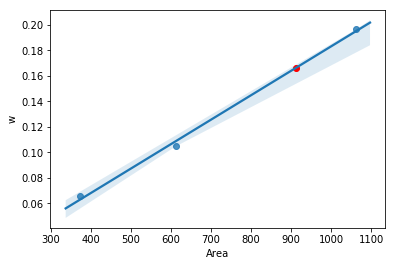

In [39]:
import seaborn as sn
plot1=plt.subplots()
plot1=sn.regplot(x='Area',y='w',data=data.loc[0:2,])
plot1=plt.scatter(x='Area',y='w',c='red',data=data.loc[3,])
plt.show()

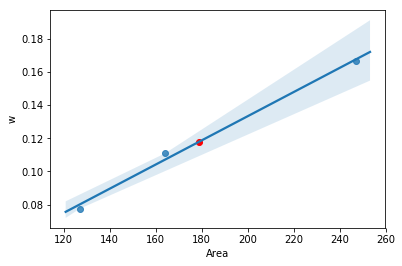

In [42]:
import seaborn as sn
plot1=plt.subplots()
plot1=sn.regplot(x='Area',y='w',data=data.loc[4:6,])
plot1=plt.scatter(x='Area',y='w',c='red',data=data.loc[7,])
plt.show()